In [1]:
import warnings

warnings.filterwarnings('ignore')

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from sklearn.datasets import load_boston

In [13]:
boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [14]:
data = boston["data"]

data.shape

(506, 13)

In [15]:
feature_names = boston["feature_names"]
target = boston["target"]

In [16]:
X = pd.DataFrame(data, columns=feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [17]:
y = pd.DataFrame(target, columns=["price"])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [28]:
from sklearn.manifold import TSNE

In [29]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(354, 13)
После:	(354, 2)


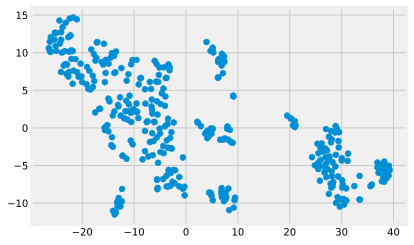

In [101]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

In [47]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter=100)

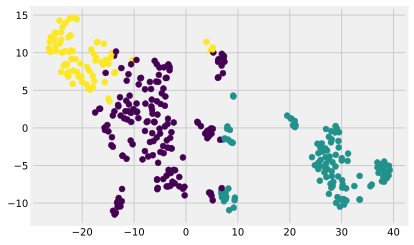

In [48]:
kmeans = KMeans(n_clusters=3)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [102]:
X_train['CRIM'].mean()

3.4698868644067806

In [103]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

0.4262868674698794

In [104]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

10.10463175438597

In [105]:
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.07632851351351352

In [106]:
y_train.mean()

price    23.015819
dtype: float64

In [107]:
y_train[labels_train == 0].mean()

price    25.295783
dtype: float64

In [108]:
y_train[labels_train == 1].mean()

price    16.402632
dtype: float64

In [109]:
y_train[labels_train == 2].mean()

price    28.089189
dtype: float64

In [110]:
labels_test = kmeans.predict(X_test_scaled)

In [114]:
X_test.loc[labels_test == 0, 'CRIM'].mean()

0.3086328767123288

In [115]:
X_test.loc[labels_test == 1, 'CRIM'].mean()

11.5153188

In [116]:
X_test.loc[labels_test == 2, 'CRIM'].mean()

0.06230448275862069

In [117]:
y_test.mean()

price    21.407895
dtype: float64

In [118]:
y_test[labels_test == 0].mean()

price    22.332877
dtype: float64

In [119]:
y_test[labels_test == 1].mean()

price    15.87
dtype: float64

In [120]:
y_test[labels_test == 2].mean()

price    28.627586
dtype: float64